## This week, we will practice how to perform dimensionality reduction with Python
First, install new libraries: **scikit-learn** and **umap-learn**

In [1]:
# !pip install scikit-learn umap-learn

## Import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS

## Load psoas muscle data
Remove rows with missing data

In [3]:
data = pd.read_excel('3011979_datasets.xlsx', sheet_name = 'psoas_strength', index_col = 0)
data = data.loc[~pd.isna(data).any(axis = 1), :]
data.head()

,Sex,Age,Ht,Wt,Rt/Lt,"Peak force, First (dominant)","Peak force, Second (dominant)","Duration/secs, First (dominant)","Duration/secs, Second (dominant)","Peak force, First (non-dominant)",...,"Psoas area, Rt","Psoas area, Lt","Psoas thickness, Rt","Psoas thickness, Lt","Psoas width, Rt","Psoas width, Lt","% fat, Rt","% fat, Lt",corridor length,anterior corridor
PatientID,,,,,,,,,,,,,,,,,,,,,
N001,M,55.0,1.70,74.0,Rt,18.5,21.9,4.6,6.6,14.6,...,18.987671,21.209954,4.912941,5.082353,5.336471,5.675294,4.802225,5.182677,0.882099,0.564706
N002,F,65.0,1.60,72.0,Rt,5.5,5.0,3.8,5.2,6.2,...,9.578674,10.210007,3.436490,2.854503,3.796767,4.960739,7.677740,14.800562,2.234000,-1.357968
N003,F,77.0,1.56,63.0,Rt,3.4,4.5,3.8,6.0,6.1,...,8.055383,9.994520,4.677494,4.621810,2.477958,3.368910,15.121444,22.372338,1.781250,0.974478
N004,M,57.0,1.60,68.0,Lt,7.5,14.0,5.6,4.0,11.1,...,18.072960,17.744915,4.613466,5.112219,5.336658,4.862843,6.362986,4.940156,1.539080,0.299252
N005,M,72.0,1.72,70.0,Lt,22.1,21.0,6.0,5.0,17.8,...,11.160336,13.229923,4.393204,4.563107,3.495146,4.296117,15.132093,11.006068,3.132949,-0.533981


## Extract MRI features (last 10 features)

In [4]:
num_data = data.iloc[:, -10:].copy()
num_data.head()

,"Psoas area, Rt","Psoas area, Lt","Psoas thickness, Rt","Psoas thickness, Lt","Psoas width, Rt","Psoas width, Lt","% fat, Rt","% fat, Lt",corridor length,anterior corridor
PatientID,,,,,,,,,,
N001,18.987671,21.209954,4.912941,5.082353,5.336471,5.675294,4.802225,5.182677,0.882099,0.564706
N002,9.578674,10.210007,3.436490,2.854503,3.796767,4.960739,7.677740,14.800562,2.234000,-1.357968
N003,8.055383,9.994520,4.677494,4.621810,2.477958,3.368910,15.121444,22.372338,1.781250,0.974478
N004,18.072960,17.744915,4.613466,5.112219,5.336658,4.862843,6.362986,4.940156,1.539080,0.299252
N005,11.160336,13.229923,4.393204,4.563107,3.495146,4.296117,15.132093,11.006068,3.132949,-0.533981


## Standardize data

In [5]:
std_data = (num_data - num_data.mean()) / num_data.std()

## Perform PCA
Check the explained variances

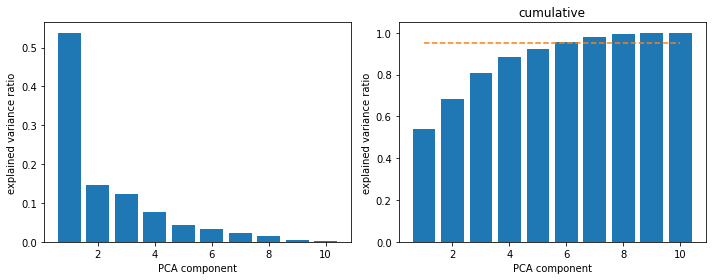

In [6]:
pca = PCA(n_components = num_data.shape[1], random_state = 3011979).fit(std_data)
pca_embed = pca.transform(std_data)

plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(1, num_data.shape[1] + 1), pca.explained_variance_ratio_)
plt.xlabel('PCA component')
plt.ylabel('explained variance ratio')

plt.subplot(1, 2, 2)
cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(1, num_data.shape[1] + 1), cumulative)
plt.plot([1, num_data.shape[1]], [0.95, 0.95], '--', color = 'tab:orange')
plt.xlabel('PCA component')
plt.ylabel('explained variance ratio')
plt.title('cumulative')

plt.tight_layout()
plt.show()

### We can use only the first 6 components for downstream analyses
Since they can capture >95% of variance

### View PCA embedding

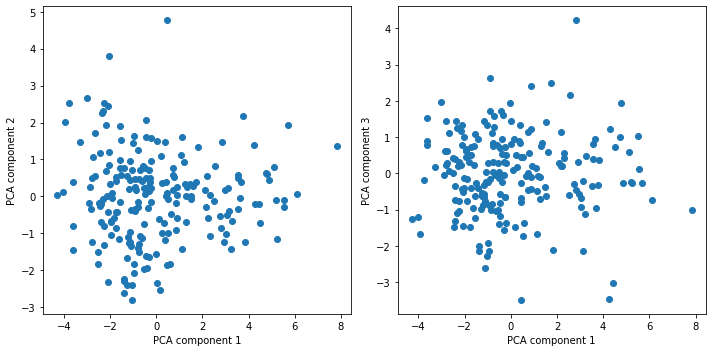

In [7]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.scatter(pca_embed[:, 0], pca_embed[:, 1])
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 2')

plt.subplot(1, 2, 2)
plt.scatter(pca_embed[:, 0], pca_embed[:, 2])
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 3')

plt.tight_layout()
plt.show()

## Use labels to make sense of the distribution

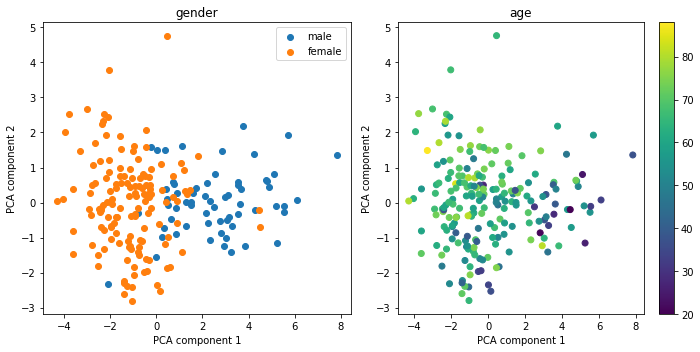

In [8]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.scatter(pca_embed[data['Sex'] == 'M', 0], pca_embed[data['Sex'] == 'M', 1], label = 'male')
plt.scatter(pca_embed[data['Sex'] == 'F', 0], pca_embed[data['Sex'] == 'F', 1], label = 'female')
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 2')
plt.legend(); plt.title('gender')

plt.subplot(1, 2, 2)
plt.scatter(pca_embed[:, 0], pca_embed[:, 1], c = data['Age']);
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 2')
plt.colorbar(); plt.title('age')

plt.tight_layout()
plt.show()

## Input features can also help us understand the embedding

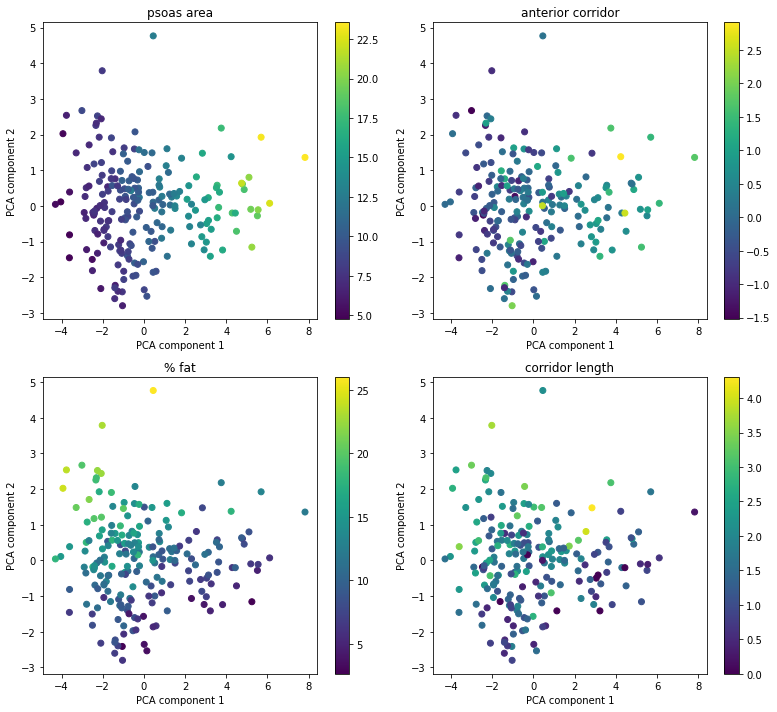

In [9]:
plt.figure(figsize = (11, 10))

plt.subplot(2, 2, 1)
plt.scatter(pca_embed[:, 0], pca_embed[:, 1], c = data['Psoas area, Rt'])
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 2')
plt.colorbar(); plt.title('psoas area')

plt.subplot(2, 2, 2)
plt.scatter(pca_embed[:, 0], pca_embed[:, 1], c = data['anterior corridor']);
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 2')
plt.colorbar(); plt.title('anterior corridor')

plt.subplot(2, 2, 3)
plt.scatter(pca_embed[:, 0], pca_embed[:, 1], c = data['% fat, Rt']);
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 2')
plt.colorbar(); plt.title('% fat')

plt.subplot(2, 2, 4)
plt.scatter(pca_embed[:, 0], pca_embed[:, 1], c = data['corridor length']);
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 2')
plt.colorbar(); plt.title('corridor length')

plt.tight_layout()
plt.show()

### PCA component 1 distinguishes psoas morphology while PCA component 2 distinguish % fat
## Let's check the loadings on the PCA components

In [10]:
print(pca.components_)

[[ 0.41440142  0.41566839  0.34889811  0.3598011   0.36106246  0.33749591
  -0.19575318 -0.22721397 -0.10804614  0.24169292]
 [ 0.11691304  0.11452215  0.13364946  0.09698878  0.15800565  0.19703768
   0.61704972  0.59102376  0.38965492 -0.01633972]
 [ 0.08107869  0.07265713 -0.1389521  -0.21389146  0.22451374  0.27713936
  -0.2516529  -0.21686769  0.52463043 -0.64053059]
 [-0.07979157 -0.05051602  0.28781255  0.37105946 -0.28252682 -0.37177451
  -0.18372542 -0.1468706   0.67283147  0.21093689]
 [-0.09347223  0.02514485  0.52860769 -0.15348477 -0.48728522  0.35632924
  -0.36291632  0.38345978 -0.11925556 -0.17394841]
 [-0.13760227  0.06528989 -0.4995131  -0.11663855  0.01461251  0.35575974
  -0.37592132  0.26726813  0.24996012  0.55828065]
 [-0.10526664  0.18994527 -0.34563811  0.67972493 -0.02421126 -0.13040085
  -0.23506612  0.35150673 -0.175949   -0.37945536]
 [ 0.33144697 -0.31944154  0.15861339 -0.19063389  0.46196304 -0.42472504
  -0.3910688   0.4236934  -0.00772176  0.01699376]


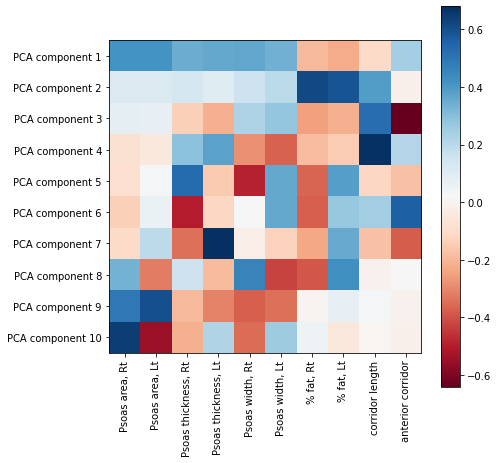

In [11]:
plt.figure(figsize = (7, 7))
plt.imshow(pca.components_, cmap = 'RdBu')
plt.xticks(range(pca.components_.shape[1]), labels = num_data.columns, rotation = 90)
plt.yticks(range(pca.components_.shape[0]), 
           labels = ['PCA component ' + str(i) for i in range(1, pca.components_.shape[0] + 1)])
plt.colorbar()
plt.show()

## PCA requires centering, but not scaling

In [12]:
center_data = num_data - num_data.mean()

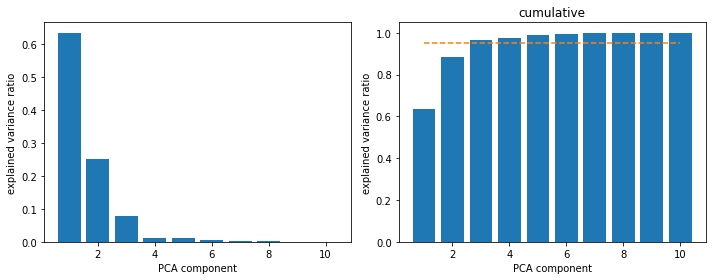

In [13]:
pca = PCA(n_components = num_data.shape[1], random_state = 3011979).fit(center_data)
pca_embed = pca.transform(center_data)

plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(1, num_data.shape[1] + 1), pca.explained_variance_ratio_)
plt.xlabel('PCA component')
plt.ylabel('explained variance ratio')

plt.subplot(1, 2, 2)
cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(1, num_data.shape[1] + 1), cumulative)
plt.plot([1, num_data.shape[1]], [0.95, 0.95], '--', color = 'tab:orange')
plt.xlabel('PCA component')
plt.ylabel('explained variance ratio')
plt.title('cumulative')

plt.tight_layout()
plt.show()

### Using 3 PCA components is enough capture >95% of variance
## Let's check the loadings

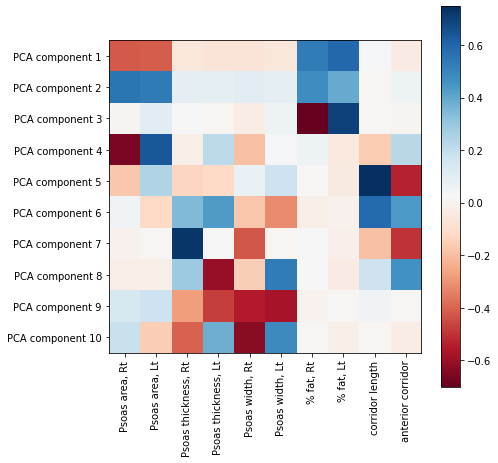

In [14]:
plt.figure(figsize = (7, 7))
plt.imshow(pca.components_, cmap = 'RdBu')
plt.xticks(range(pca.components_.shape[1]), labels = num_data.columns, rotation = 90)
plt.yticks(range(pca.components_.shape[0]), 
           labels = ['PCA component ' + str(i) for i in range(1, pca.components_.shape[0] + 1)])
plt.colorbar()
plt.show()

## 3rd component looks interesting
Difference in %fat between left and right psoas

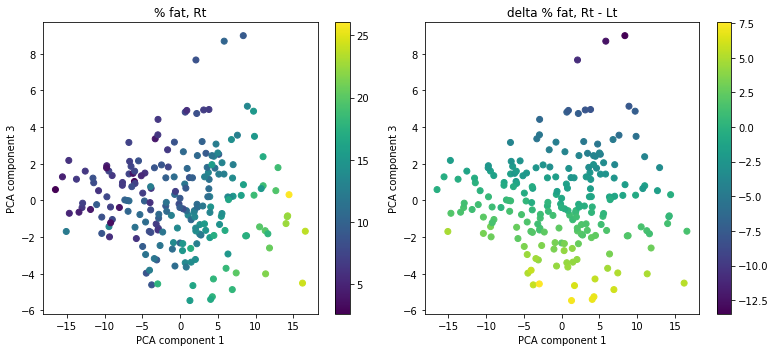

In [15]:
plt.figure(figsize = (11, 5))

plt.subplot(1, 2, 1)
plt.scatter(pca_embed[:, 0], pca_embed[:, 2], c = data['% fat, Rt'])
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 3')
plt.colorbar(); plt.title('% fat, Rt')

plt.subplot(1, 2, 2)
plt.scatter(pca_embed[:, 0], pca_embed[:, 2], c = data['% fat, Rt'] - data['% fat, Lt']);
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 3')
plt.colorbar(); plt.title('delta % fat, Rt - Lt')

plt.tight_layout()
plt.show()

## 1st and 2nd components focus on psoas area and %fat

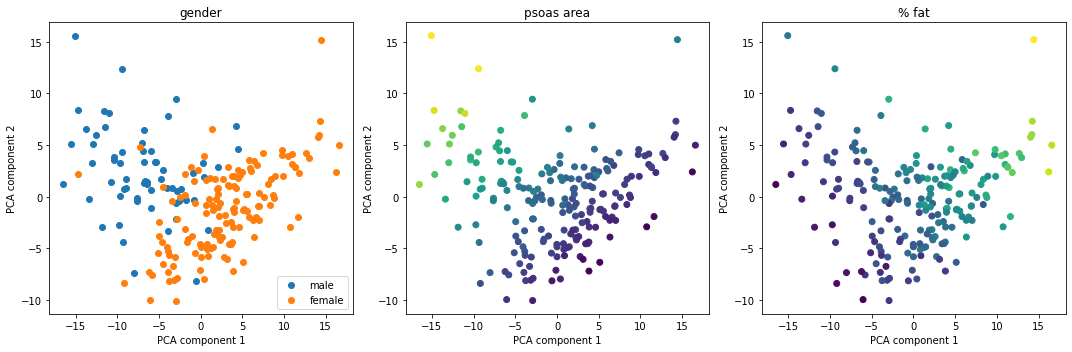

In [16]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.scatter(pca_embed[data['Sex'] == 'M', 0], pca_embed[data['Sex'] == 'M', 1], label = 'male')
plt.scatter(pca_embed[data['Sex'] == 'F', 0], pca_embed[data['Sex'] == 'F', 1], label = 'female')
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 2')
plt.legend(); plt.title('gender')

plt.subplot(1, 3, 2)
plt.scatter(pca_embed[:, 0], pca_embed[:, 1], c = data['Psoas area, Rt'])
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 2')
plt.title('psoas area')

plt.subplot(1, 3, 3)
plt.scatter(pca_embed[:, 0], pca_embed[:, 1], c = data['% fat, Rt'])
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 2')
plt.title('% fat')

plt.tight_layout()
plt.show()

## Load [MOCA](http://3.bp.blogspot.com/-dxHUTGYhaPk/UQkv5kpnNMI/AAAAAAAAHUg/VJyBo7QbK8E/s1600/MoCA.jpg) test data
Remove rows with missing data

In [17]:
data = pd.read_excel('3011979_datasets.xlsx', sheet_name = 'moca', index_col = 0)
data = data.loc[~pd.isna(data).any(axis = 1), :]
data.head()

,CUBE,CLOCKCON,CLOCKNO,CLOCKHAN,feature1,feature2,feature3,feature4,feature5,feature6,...,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37
TRAILS,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2.0,3.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0
1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Check distribution of total scores

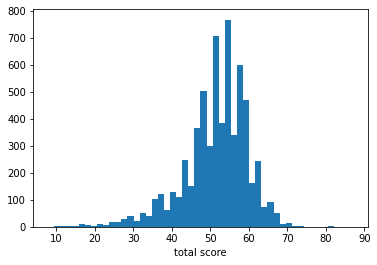

In [18]:
data['TOTAL'] = data.sum(axis = 1)

plt.hist(data['TOTAL'], bins = 50)
plt.xlabel('total score')
plt.show()

### Consider patients with score between 30 and 35

In [19]:
sub_data = data.loc[(data['TOTAL'] >= 30) & (data['TOTAL'] <= 35), :].copy()
num_data = sub_data.copy()
std_data = (num_data - num_data.mean()) / num_data.std()
print(num_data.shape)

(198, 42)


## Define custom distance function between patients

In [20]:
def similar_mistake_dist(p1, p2):
    mistake1 = (p1 == 0)
    mistake2 = (p2 == 0)
    
    if sum(mistake1) == 0 and sum(mistake2) == 0: ## perfect score
        return 0
    
    return sum(mistake1 & mistake2) / sum(mistake1 | mistake2)

## Precompute pairwise distance matrix

In [21]:
precomputed_dist = np.zeros([num_data.shape[0], num_data.shape[0]])

for i1 in range(num_data.shape[0] - 1):
    for i2 in range(i1 + 1, num_data.shape[0]):
        precomputed_dist[i1, i2] = similar_mistake_dist(num_data.iloc[i1, :], num_data.iloc[i2, :])
        precomputed_dist[i2, i1] = precomputed_dist[i1, i2] ## symmetric

In [22]:
print(precomputed_dist)

[[0.         0.22727273 0.18518519 ... 0.18181818 0.27272727 0.3       ]
 [0.22727273 0.         0.27586207 ... 0.34782609 0.375      0.29166667]
 [0.18518519 0.27586207 0.         ... 0.33333333 0.58333333 0.33333333]
 ...
 [0.18181818 0.34782609 0.33333333 ... 0.         0.33333333 0.25      ]
 [0.27272727 0.375      0.58333333 ... 0.33333333 0.         0.39130435]
 [0.3        0.29166667 0.33333333 ... 0.25       0.39130435 0.        ]]


## Perform embedding using PCoA (or metric MDS)

In [23]:
pcoa_default = MDS(n_components = 3, metric = True, random_state = 3011979, dissimilarity = 'euclidean').fit_transform(std_data)
pcoa_custom = MDS(n_components = 3, metric = True, random_state = 3011979, dissimilarity = 'precomputed').fit_transform(precomputed_dist)

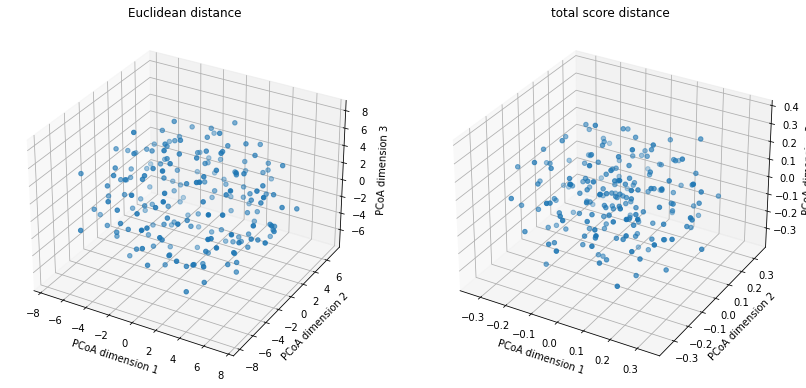

In [24]:
fig = plt.figure(figsize = (14, 7))

ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.scatter(pcoa_default[:, 0], pcoa_default[:, 1], pcoa_default[:, 2])

ax.set_xlabel('PCoA dimension 1')
ax.set_ylabel('PCoA dimension 2')
ax.set_zlabel('PCoA dimension 3')
plt.title('Euclidean distance')

ax = fig.add_subplot(1, 2, 2, projection = '3d')
ax.scatter(pcoa_custom[:, 0], pcoa_custom[:, 1], pcoa_custom[:, 2])

ax.set_xlabel('PCoA dimension 1')
ax.set_ylabel('PCoA dimension 2')
ax.set_zlabel('PCoA dimension 3')
plt.title('total score distance')

plt.show()

## Colored by total test score

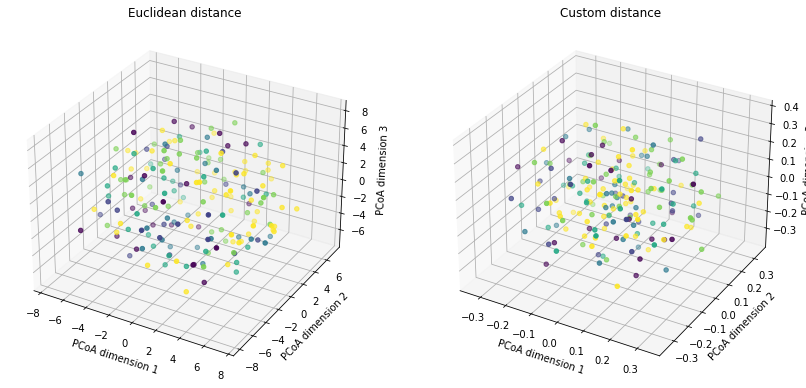

In [25]:
fig = plt.figure(figsize = (14, 7))

ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.scatter(pcoa_default[:, 0], pcoa_default[:, 1], pcoa_default[:, 2], c = num_data['TOTAL'])

ax.set_xlabel('PCoA dimension 1')
ax.set_ylabel('PCoA dimension 2')
ax.set_zlabel('PCoA dimension 3')
plt.title('Euclidean distance')

ax = fig.add_subplot(1, 2, 2, projection = '3d')
ax.scatter(pcoa_custom[:, 0], pcoa_custom[:, 1], pcoa_custom[:, 2], c = num_data['TOTAL'])

ax.set_xlabel('PCoA dimension 1')
ax.set_ylabel('PCoA dimension 2')
ax.set_zlabel('PCoA dimension 3')
plt.title('Custom distance')

plt.show()

## Colored by number of mistakes

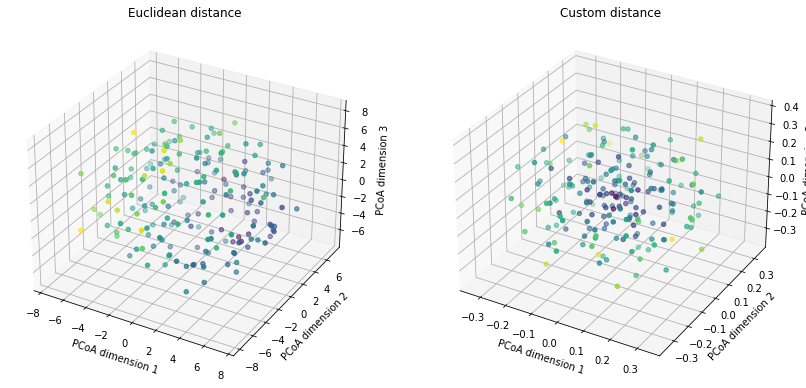

In [26]:
fig = plt.figure(figsize = (14, 7))

ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.scatter(pcoa_default[:, 0], pcoa_default[:, 1], pcoa_default[:, 2], c = (num_data == 0).sum(axis = 1))

ax.set_xlabel('PCoA dimension 1')
ax.set_ylabel('PCoA dimension 2')
ax.set_zlabel('PCoA dimension 3')
plt.title('Euclidean distance')

ax = fig.add_subplot(1, 2, 2, projection = '3d')
ax.scatter(pcoa_custom[:, 0], pcoa_custom[:, 1], pcoa_custom[:, 2], c = (num_data == 0).sum(axis = 1))

ax.set_xlabel('PCoA dimension 1')
ax.set_ylabel('PCoA dimension 2')
ax.set_zlabel('PCoA dimension 3')
plt.title('Custom distance')

plt.show()

## Compare to PCA

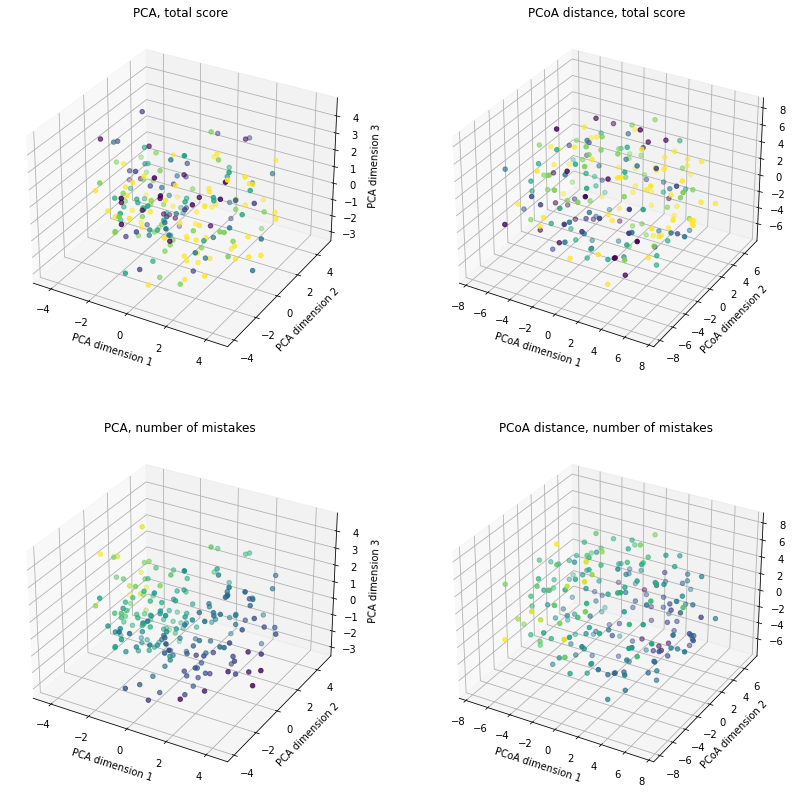

In [27]:
pca = PCA(n_components = num_data.shape[1], random_state = 3011979).fit(std_data)
pca_embed = pca.transform(std_data)

fig = plt.figure(figsize = (14, 14))

ax = fig.add_subplot(2, 2, 1, projection = '3d')
ax.scatter(pca_embed[:, 0], pca_embed[:, 1], pca_embed[:, 2], c = num_data['TOTAL'])

ax.set_xlabel('PCA dimension 1')
ax.set_ylabel('PCA dimension 2')
ax.set_zlabel('PCA dimension 3')
plt.title('PCA, total score')

ax = fig.add_subplot(2, 2, 2, projection = '3d')
ax.scatter(pcoa_default[:, 0], pcoa_default[:, 1], pcoa_default[:, 2], c = num_data['TOTAL'])

ax.set_xlabel('PCoA dimension 1')
ax.set_ylabel('PCoA dimension 2')
ax.set_zlabel('PCoA dimension 3')
plt.title('PCoA distance, total score')

ax = fig.add_subplot(2, 2, 3, projection = '3d')
ax.scatter(pca_embed[:, 0], pca_embed[:, 1], pca_embed[:, 2], c = (num_data == 0).sum(axis = 1))

ax.set_xlabel('PCA dimension 1')
ax.set_ylabel('PCA dimension 2')
ax.set_zlabel('PCA dimension 3')
plt.title('PCA, number of mistakes')

ax = fig.add_subplot(2, 2, 4, projection = '3d')
ax.scatter(pcoa_default[:, 0], pcoa_default[:, 1], pcoa_default[:, 2], c = (num_data == 0).sum(axis = 1))

ax.set_xlabel('PCoA dimension 1')
ax.set_ylabel('PCoA dimension 2')
ax.set_zlabel('PCoA dimension 3')
plt.title('PCoA distance, number of mistakes')

plt.show()

## Next up is t-SNE
Try various perplexity settings

### Colored by total score and number of mistakes

C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarnin

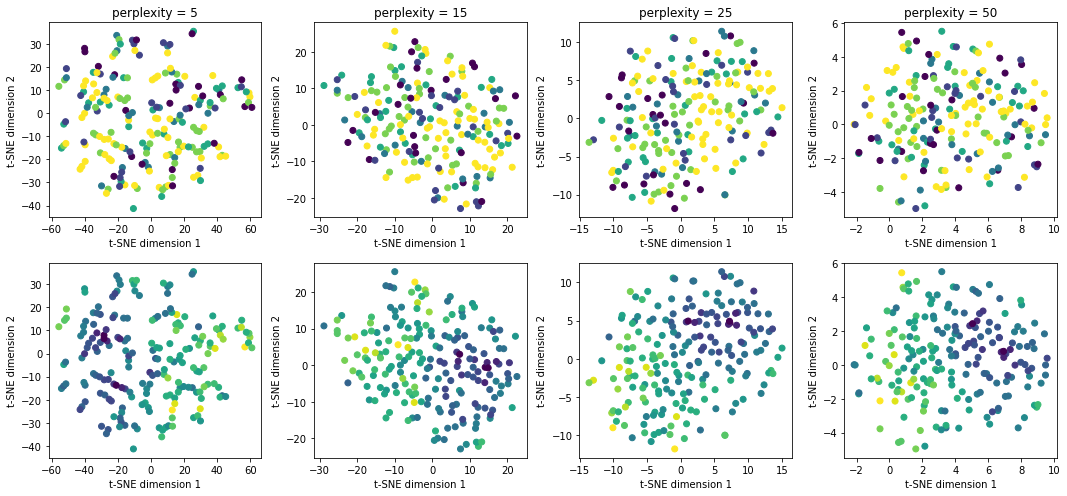

In [28]:
ks = [5, 15, 25, 50]

plt.figure(figsize = (15, 7))

for i, k in enumerate(ks, start = 1):
    plt.subplot(2, 4, i)
    tsne_embed = TSNE(n_components = 2, perplexity = k, random_state = 3011979).fit_transform(std_data)
    plt.scatter(tsne_embed[:, 0], tsne_embed[:, 1], c = num_data['TOTAL'])
    plt.xlabel('t-SNE dimension 1'); plt.ylabel('t-SNE dimension 2')
    plt.title('perplexity = ' + str(k))
    
    plt.subplot(2, 4, i + 4)
    tsne_embed = TSNE(n_components = 2, perplexity = k, random_state = 3011979).fit_transform(std_data)
    plt.scatter(tsne_embed[:, 0], tsne_embed[:, 1], c = (num_data == 0).sum(axis = 1))
    plt.xlabel('t-SNE dimension 1'); plt.ylabel('t-SNE dimension 2')

plt.tight_layout()
plt.show()

## Compare PCA, PCoA, and t-SNE on some features
### CUBE score

C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


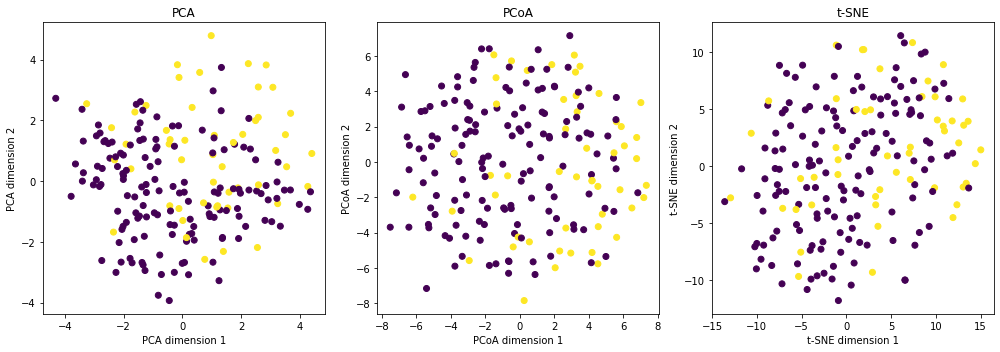

In [29]:
tsne_embed = TSNE(n_components = 2, perplexity = 25, random_state = 3011979).fit_transform(std_data)

plt.figure(figsize = (14, 5))

plt.subplot(1, 3, 1)
plt.scatter(pca_embed[:, 0], pca_embed[:, 1], c = sub_data['CUBE'])
plt.xlabel('PCA dimension 1'); plt.ylabel('PCA dimension 2')
plt.title('PCA')

plt.subplot(1, 3, 2)
plt.scatter(pcoa_default[:, 0], pcoa_default[:, 1], c = sub_data['CUBE'])
plt.xlabel('PCoA dimension 1'); plt.ylabel('PCoA dimension 2')
plt.title('PCoA')

plt.subplot(1, 3, 3)
plt.scatter(tsne_embed[:, 0], tsne_embed[:, 1], c = sub_data['CUBE'])
plt.xlabel('t-SNE dimension 1'); plt.ylabel('t-SNE dimension 2')
plt.title('t-SNE')

plt.tight_layout()
plt.show()

### Clock drawing score

C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sira\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


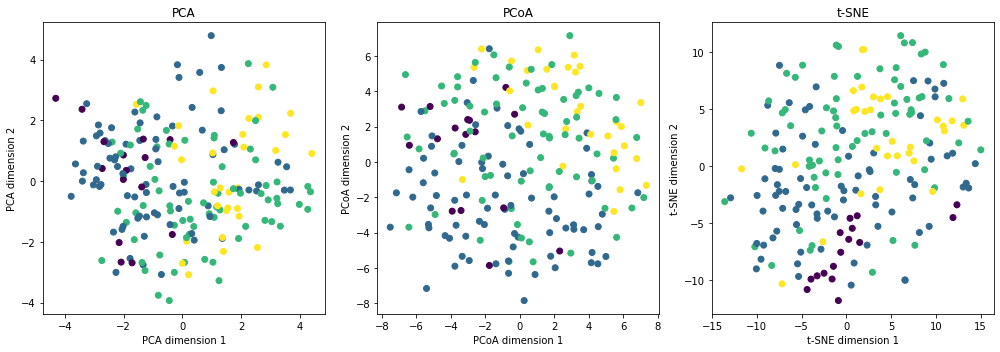

In [30]:
tsne_embed = TSNE(n_components = 2, perplexity = 25, random_state = 3011979).fit_transform(std_data)

plt.figure(figsize = (14, 5))

plt.subplot(1, 3, 1)
plt.scatter(pca_embed[:, 0], pca_embed[:, 1], c = sub_data['CLOCKHAN'] + sub_data['CLOCKCON'] + sub_data['CLOCKNO'])
plt.xlabel('PCA dimension 1'); plt.ylabel('PCA dimension 2')
plt.title('PCA')

plt.subplot(1, 3, 2)
plt.scatter(pcoa_default[:, 0], pcoa_default[:, 1], c = sub_data['CLOCKHAN'] + sub_data['CLOCKCON'] + sub_data['CLOCKNO'])
plt.xlabel('PCoA dimension 1'); plt.ylabel('PCoA dimension 2')
plt.title('PCoA')

plt.subplot(1, 3, 3)
plt.scatter(tsne_embed[:, 0], tsne_embed[:, 1], c = sub_data['CLOCKHAN'] + sub_data['CLOCKCON'] + sub_data['CLOCKNO'])
plt.xlabel('t-SNE dimension 1'); plt.ylabel('t-SNE dimension 2')
plt.title('t-SNE')

plt.tight_layout()
plt.show()

## UMAP
With and without density-preserving mode

In [31]:
umap_embed = umap.UMAP(n_components = 2, n_neighbors = 25, random_state = 3011979).fit_transform(std_data)
densmap_embed = umap.UMAP(n_components = 2, n_neighbors = 25, densmap = True,
                          random_state = 3011979).fit_transform(std_data)

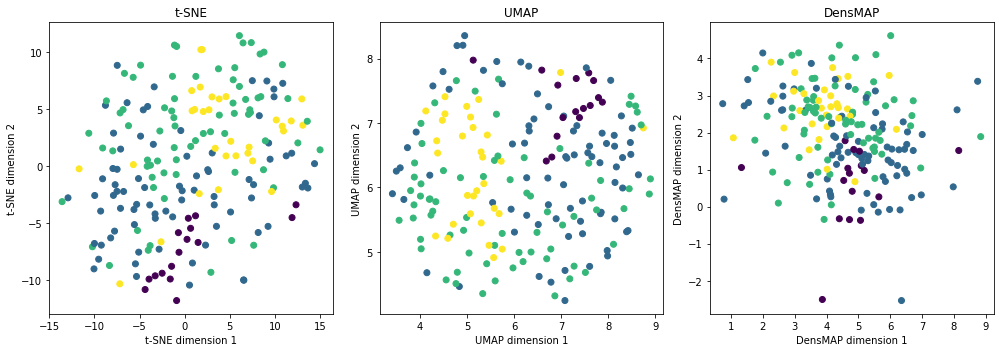

In [32]:
plt.figure(figsize = (14, 5))

plt.subplot(1, 3, 1)
plt.scatter(tsne_embed[:, 0], tsne_embed[:, 1], c = sub_data['CLOCKHAN'] + sub_data['CLOCKCON'] + sub_data['CLOCKNO'])
plt.xlabel('t-SNE dimension 1'); plt.ylabel('t-SNE dimension 2')
plt.title('t-SNE')

plt.subplot(1, 3, 2)
plt.scatter(umap_embed[:, 0], umap_embed[:, 1], c = sub_data['CLOCKHAN'] + sub_data['CLOCKCON'] + sub_data['CLOCKNO'])
plt.xlabel('UMAP dimension 1'); plt.ylabel('UMAP dimension 2')
plt.title('UMAP')

plt.subplot(1, 3, 3)
plt.scatter(densmap_embed[:, 0], densmap_embed[:, 1], c = sub_data['CLOCKHAN'] + sub_data['CLOCKCON'] + sub_data['CLOCKNO'])
plt.xlabel('DensMAP dimension 1'); plt.ylabel('DensMAP dimension 2')
plt.title('DensMAP')

plt.tight_layout()
plt.show()

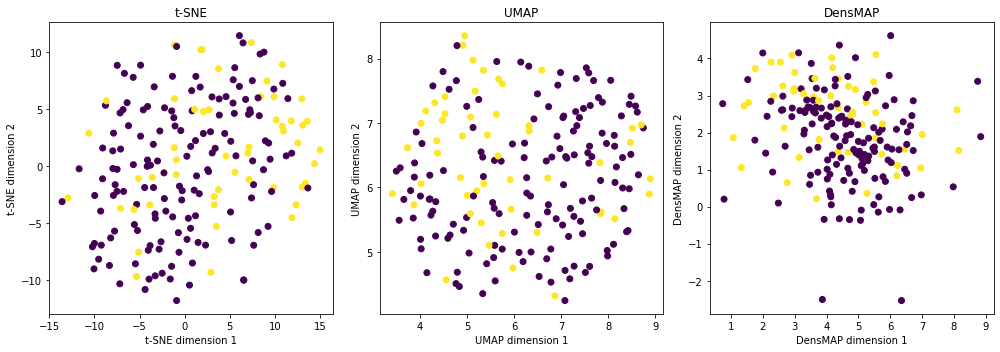

In [33]:
plt.figure(figsize = (14, 5))

plt.subplot(1, 3, 1)
plt.scatter(tsne_embed[:, 0], tsne_embed[:, 1], c = sub_data['CUBE'])
plt.xlabel('t-SNE dimension 1'); plt.ylabel('t-SNE dimension 2')
plt.title('t-SNE')

plt.subplot(1, 3, 2)
plt.scatter(umap_embed[:, 0], umap_embed[:, 1], c = sub_data['CUBE'])
plt.xlabel('UMAP dimension 1'); plt.ylabel('UMAP dimension 2')
plt.title('UMAP')

plt.subplot(1, 3, 3)
plt.scatter(densmap_embed[:, 0], densmap_embed[:, 1], c = sub_data['CUBE'])
plt.xlabel('DensMAP dimension 1'); plt.ylabel('DensMAP dimension 2')
plt.title('DensMAP')

plt.tight_layout()
plt.show()